In [17]:
import os
import sys
module_path = os.path.abspath(os.path.join('fede'))
if module_path not in sys.path:
    sys.path.append(module_path)
from client import Client
from supported_modles import Supported_modles
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import numpy as np
import utils

In [2]:
selected_model = Supported_modles.NN_classifier
client1 = Client("node1","0.0.0.0", 5001, selected_model)
dataset = client1.load_data('data/Wednesday-workingHours.pcap_ISCX.csv', True)

Creating node1.


In [3]:
client1.preprocess_data(dataset, True)

439683
251723


In [4]:
client1.prep_data()

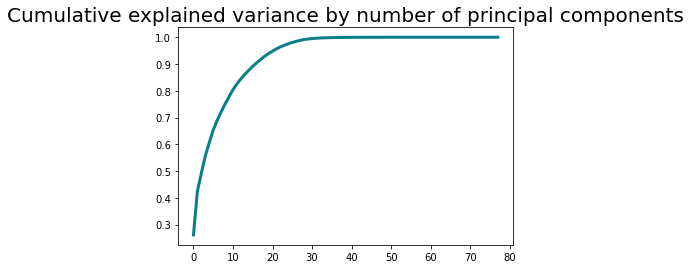

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(client1.x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [8]:
import pandas as pd

In [12]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(client1.feature_names) + 1)],
    index=client1.feature_names
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78
Destination Port,-0.204294,0.010896,0.042399,0.056142,0.512726,-0.061614,-0.198903,-0.042922,-0.134494,0.446075,...,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
Flow Duration,0.887645,-0.012713,0.156508,-0.025331,0.013524,0.153598,-0.019654,0.031178,0.003178,0.050160,...,-1.158754e-30,-8.478990e-31,-7.341384e-31,9.319579e-32,1.530629e-32,-1.559194e-32,3.977790e-32,7.982011e-34,2.068087e-33,-1.916148e-32
Total Fwd Packets,0.034144,0.992682,-0.029871,-0.074400,-0.012890,-0.003022,-0.008901,-0.010054,-0.000108,-0.008509,...,-2.876328e-19,2.652623e-19,2.972959e-19,1.898375e-21,-5.716187e-22,-3.019273e-23,7.346918e-23,4.601345e-23,5.264877e-23,4.795892e-30
Total Backward Packets,0.033673,0.991865,-0.030137,-0.074917,-0.013400,-0.004606,-0.009177,-0.010174,-0.000508,-0.008340,...,8.807237e-19,1.134808e-18,1.910999e-18,6.036537e-20,1.441013e-21,5.371930e-21,1.723782e-20,-1.548596e-21,2.453026e-22,3.418023e-29
Total Length of Fwd Packets,0.090326,0.795148,0.124117,0.263857,0.067836,0.004192,0.047259,0.056603,0.000472,0.055286,...,-1.108099e-18,-1.258775e-18,-2.160238e-18,-7.024322e-20,-1.655451e-21,-6.289520e-21,-2.018609e-20,1.829040e-21,-2.867980e-22,-3.997579e-29


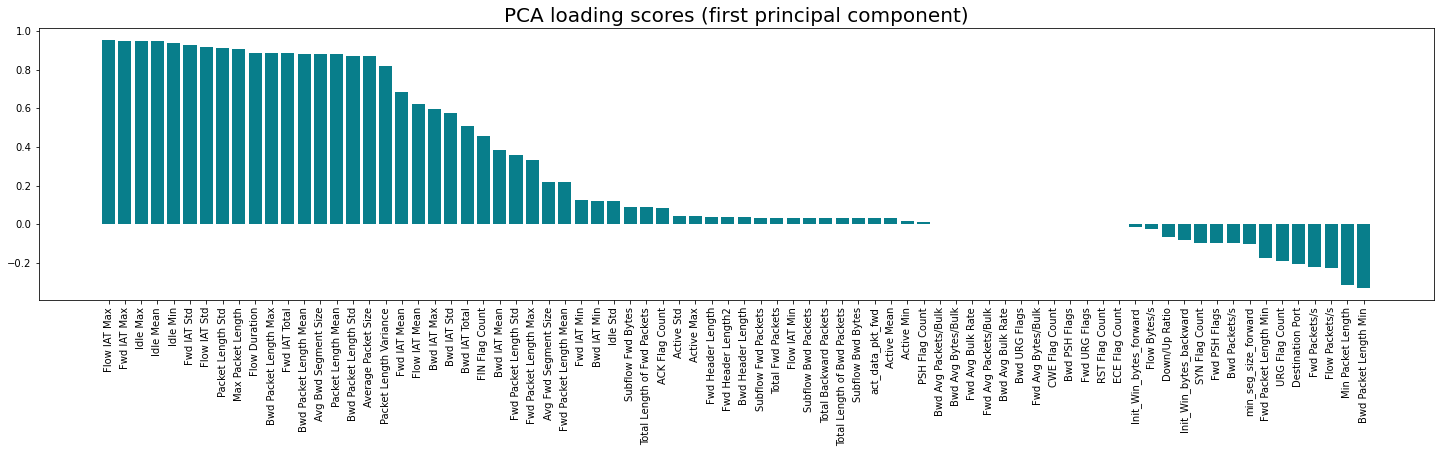

In [16]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.rcParams["figure.figsize"] = (25,5)
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
client, X,y, test_x, test_y = utils.centralized_data(selected_model, False, False,False)

Creating node1.
Creating node2.


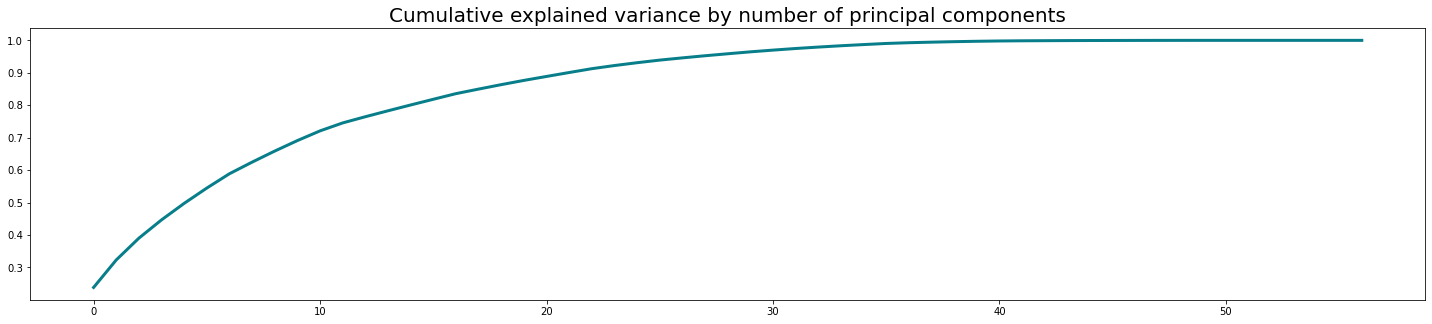

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [20]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(client.feature_names) + 1)],
    index=client.feature_names
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
dur,0.095282,-0.097746,0.199761,0.363940,0.152985,0.194091,0.163473,0.528438,-0.202601,-0.305676,...,0.000430,-0.000774,0.000198,-0.000035,0.000001,-4.001321e-31,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
spkts,0.161572,0.106221,0.510989,0.703602,0.197261,-0.329780,-0.045627,-0.040418,-0.025191,0.081945,...,-0.038715,0.000327,-0.002759,-0.003355,-0.000003,-3.323923e-31,3.054907e-30,4.058520e-32,4.767865e-31,-6.051288e-32
dpkts,0.217843,0.186068,0.821001,0.101987,-0.120781,0.354815,0.148200,-0.109391,0.096694,0.018739,...,0.040414,-0.005806,-0.005897,0.013515,0.000002,3.044920e-30,-3.168528e-30,-2.320725e-31,-1.335819e-30,1.294579e-31
sbytes,0.080988,0.067565,0.343767,0.755508,0.244073,-0.404945,-0.082639,-0.042377,0.006287,0.095787,...,-0.002880,-0.005195,-0.020362,0.006343,-0.000003,1.982521e-31,-1.127088e-30,7.668708e-31,-1.137633e-30,-1.473788e-31
dbytes,0.151606,0.162189,0.767678,-0.013871,-0.170732,0.477450,0.155303,-0.103095,0.129940,-0.002160,...,-0.039953,0.008588,0.015866,0.008374,0.000001,2.284263e-30,-4.450410e-30,-9.665637e-32,-2.791440e-31,6.681902e-32


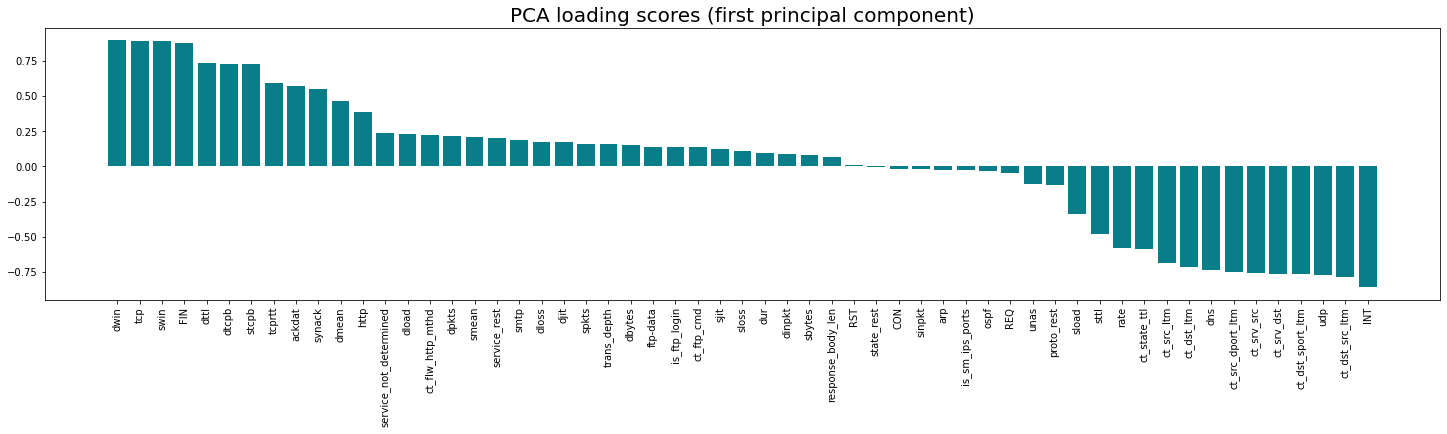

In [21]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.rcParams["figure.figsize"] = (25,5)
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()
